In [4]:
import uproot
import numpy as np
import matplotlib.pyplot as plt

file=uproot.open("snb_radio_dune10kt_1x2x6_8073_20171222T211546_reco0_extracted_hist.root")

print("\n",file.keys())

# signal_tree=file["dataextract/SignalTree"]
# wire_tree  =file["dataextract/WireTree"]
hit_tree   =file["dataextract/HitTree"]

# print(wire_tree.show())
print(hit_tree.show())



 ['dataextract;1', 'dataextract/MCTruthTree;1', 'dataextract/WireTree;1', 'dataextract/HitTree;1', 'dataextract/SignalTree;1']
name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
EventID              | int32_t                  | AsDtype('>i4')
HitWire              | int32_t                  | AsDtype('>i4')
HitTPC               | int32_t                  | AsDtype('>i4')
HitPlane             | int32_t                  | AsDtype('>i4')
HitCryostat          | int32_t                  | AsDtype('>i4')
HitPeakTime          | int32_t                  | AsDtype('>i4')
HitIntegral          | int32_t                  | AsDtype('>i4')
None


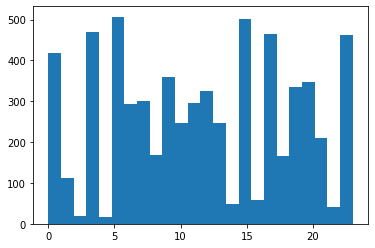

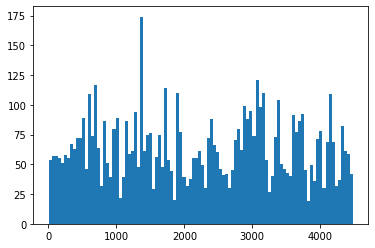

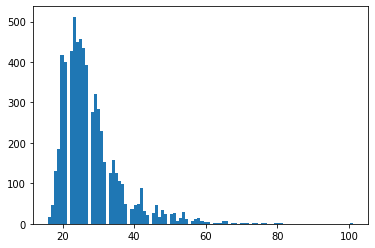

In [11]:
plt.hist(hit_tree["HitTPC"].array(),24,[0,23]);
plt.show()
plt.hist(hit_tree["HitPeakTime"].array(),100);
plt.show()
plt.hist(hit_tree["HitIntegral"].array(),100);
#Value of tpc goes from 0 to 23, 24 TPCs, then each one has 3 planes 


In [18]:
Event_label =np.array(hit_tree["EventID"].array())
TPC_label   =np.array(hit_tree["HitTPC"].array())
plane_label =np.array(hit_tree["HitPlane"].array())

time_label  =np.array(hit_tree["HitPeakTime"].array())
charge_label=np.array(hit_tree["HitIntegral"].array())
wire_label  =np.array(hit_tree["HitWire"].array())

Events=np.unique(Event_label)


print("Number of evts :        ",len(Events))
print("Number of hits :        ",len(Event_label))


def plot_event(event,plane,tpc):
   sel_ev   = Event_label == event                    #from list, get only the elements of each event
   sel_plane= plane_label == plane                     #select fixed TPC and plane
   sel_TPC  = TPC_label   == tpc                     #select fixed TPC and plane

   sel_time  = time_label  [sel_ev*sel_plane*sel_TPC]#get the labels for the branches that form each picture
   sel_charge= charge_label[sel_ev*sel_plane*sel_TPC]#and the real number of each wire
   sel_wire  = wire_label[sel_ev*sel_plane*sel_TPC]#and the real number of each wire

   plt.figure(dpi=200)
   plt.hist2d(sel_wire,sel_time,[500,500],weights=sel_charge,cmin=1);
   plt.colorbar()

Number of evts :         1
Number of hits :         6416


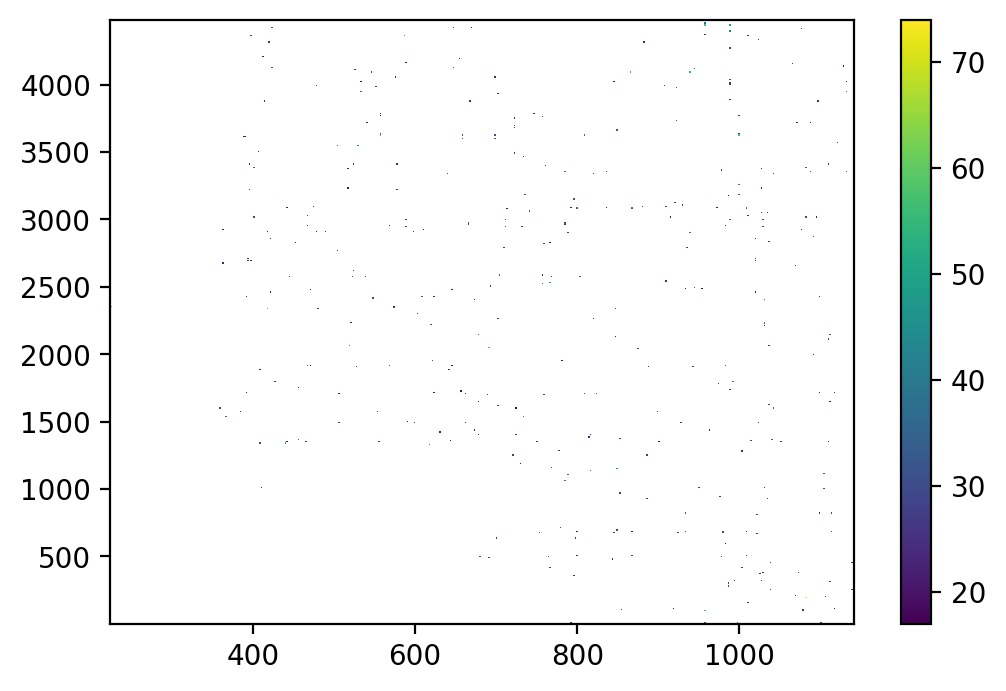

In [34]:
%matplotlib inline


In [184]:
Nrow = len(signal_tree[sel_sig[0]].array()[0])
Ncol = max(sel_wireN)
pic=np.zeros([Nrow,Ncol])
for wire,sig in zip(sel_wireN,sel_sig):
    pic[:,wire-1]=signal_tree[sig].array()[0]

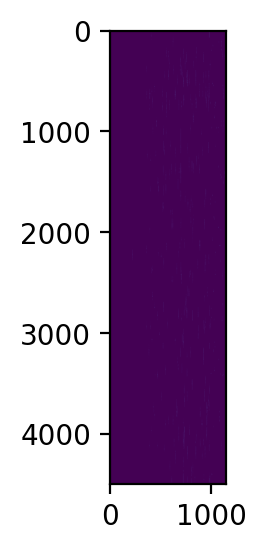

In [185]:
plt.figure(figsize=[3,3],dpi=200)
plt.imshow(np.abs(pic),interpolation=None);

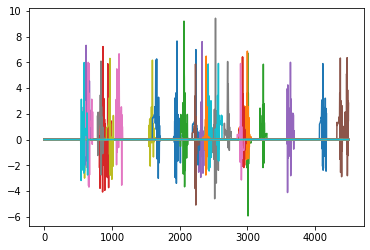

In [198]:
for i in range(30):
    plt.plot(signal_tree["Signal_"+str(i)].array()[0])
    # plt.xlim([3800,4500])